# Feature Scoring

In [1]:
import win32com.client
import pandas as pd
import numpy as np
import math

import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from ema_workbench.analysis import feature_scoring
from ema_workbench import load_results

C:\Users\nlilbm\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\nlilbm\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [57]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

In [59]:
experiments

,EBIKE_BASIS,EBIKE_OW,KMKOSTENINDEX,OVKOSTENINDEX,THUISWERKREDUCTIE,scenario,policy,model,model_file,output_file
0,0.263005,0.107353,0.784278,1.106279,0.906311,0,basecase,testmodel,Policy base.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
1,0.272624,0.090835,0.715237,1.150484,0.919753,1,basecase,testmodel,Policy base.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
2,0.234302,0.103523,0.903546,1.044638,0.982028,2,basecase,testmodel,Policy base.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
3,0.257075,0.096560,0.704871,1.062797,0.945834,3,basecase,testmodel,Policy base.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
4,0.243804,0.106663,0.869091,1.195267,0.989215,4,basecase,testmodel,Policy base.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
...,...,...,...,...,...,...,...,...,...,...
995,0.236347,0.102760,0.728212,1.180825,0.996367,245,parkeren,testmodel,Policy parkeren.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
996,0.251791,0.092805,0.950143,1.031262,0.879946,246,parkeren,testmodel,Policy parkeren.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
997,0.233351,0.101756,0.897908,1.051852,0.972454,247,parkeren,testmodel,Policy parkeren.ver,Grovem_TAB_GroVem_ref_1a1.xlsx
998,0.224496,0.098536,0.948373,1.039433,0.915481,248,parkeren,testmodel,Policy parkeren.ver,Grovem_TAB_GroVem_ref_1a1.xlsx


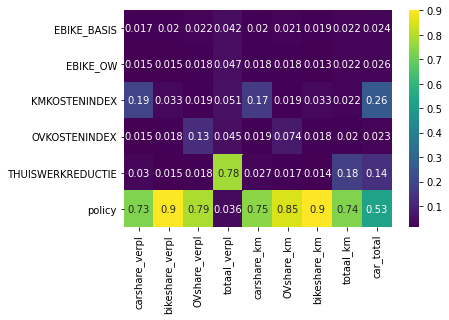

In [3]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

x = experiments.drop('model_file', axis=1)
y = outcomes
y['car_total'] = y['carshare_km'] * y['totaal_km']

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [15]:
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType

results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

x = experiments.drop('model_file', axis=1)
y = outcomes['car_total']

scores = feature_scoring.get_ex_feature_scores(x, y,
                                      max_features=2, mode=RuleInductionType.REGRESSION)[0]

scores = scores.rename(columns = {1:'car_total'})
scores.round(2)

,car_total
0,
policy,0.52
KMKOSTENINDEX,0.26
THUISWERKREDUCTIE,0.14
EBIKE_BASIS,0.03
EBIKE_OW,0.03
OVKOSTENINDEX,0.03


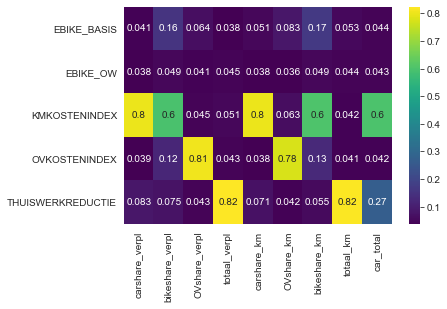

In [37]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

x = experiments.drop(['model_file','policy'], axis=1).iloc[:250,:]
y = outcomes
y['car_total'] = y['carshare_km'] * y['totaal_km']
for i in y.keys():
    y[i] = y[i][:250]

fs_base = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs_base, cmap='viridis', annot=True)
plt.show()

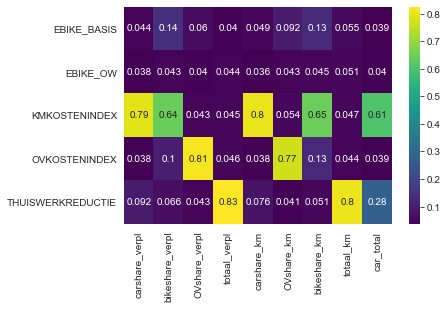

In [39]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

x = experiments.drop(['model_file'], axis=1).iloc[250:500,:]
y = outcomes
y['car_total'] = y['carshare_km'] * y['totaal_km']
for i in y.keys():
    y[i] = y[i][250:500]

fs_bike = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs_bike, cmap='viridis', annot=True)
plt.show()

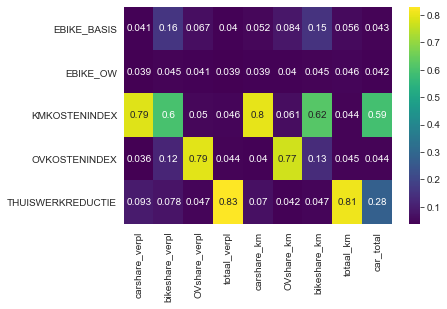

In [38]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

x = experiments.drop(['model_file','policy'], axis=1).iloc[500:750,:]
y = outcomes
y['car_total'] = y['carshare_km'] * y['totaal_km']
for i in y.keys():
    y[i] = y[i][500:750]

fs_30km = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs_30km, cmap='viridis', annot=True)
plt.show()

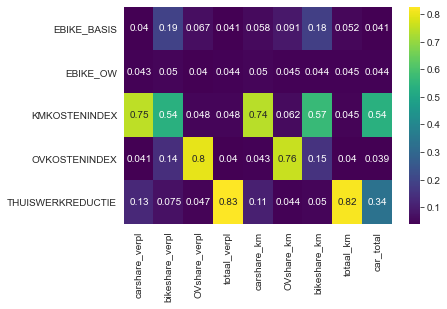

In [40]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

x = experiments.drop('model_file', axis=1).iloc[750:,:]
y = outcomes
y['car_total'] = y['carshare_km'] * y['totaal_km']
for i in y.keys():
    y[i] = y[i][750:]

fs_park = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs_park, cmap='viridis', annot=True)
plt.show()

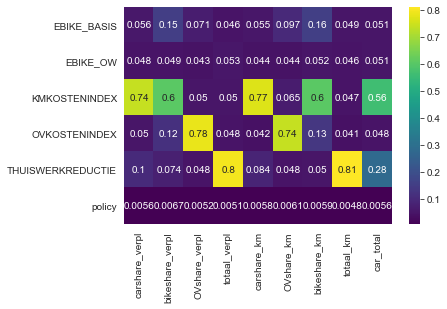

In [31]:
results = load_results('250 scenarios 4 policies.tar.gz')

experiments, outcomes = results

experiments = experiments[(experiments['policy'] == 'basecase') | (experiments['policy'] == '30 km')]
x = experiments.drop('model_file', axis=1)
z = outcomes
z['car_total'] = z['carshare_km'] * z['totaal_km']
y = {}
for i in z.keys():
    y[i] = z[i][0:250]
    y[i] = np.append(y[i], z[i][500:750])
    
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [85]:
all_fs = {}
var_int = 'car_total'
all_fs['base'] = fs_base[var_int]
all_fs['30km'] = fs_30km[var_int]
all_fs['bike'] = fs_bike[var_int]
all_fs['parking'] = fs_park[var_int]
all_fs = pd.DataFrame(all_fs).T

In [86]:
all_fs

,EBIKE_BASIS,EBIKE_OW,KMKOSTENINDEX,OVKOSTENINDEX,THUISWERKREDUCTIE
base,0.044131,0.043043,0.601668,0.042284,0.268875
30km,0.042569,0.041918,0.593803,0.044258,0.277453
bike,0.038544,0.039974,0.606657,0.039055,0.275770
parking,0.041003,0.044231,0.540053,0.038679,0.336034


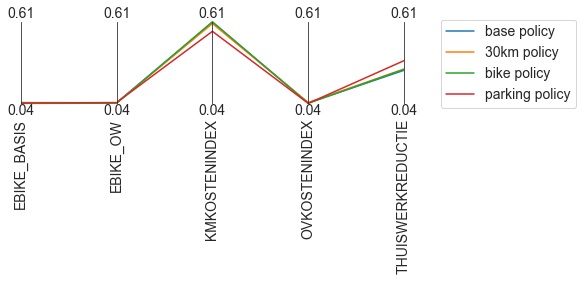

In [87]:
from ema_workbench.analysis import parcoords

colors = iter(sns.color_palette())

policies = [i for i in all_fs.columns]

data = all_fs.loc[:, [i for i in all_fs.columns]]
limits = parcoords.get_limits(data)
limits.iloc[0,:] = limits.loc[0,:].min()
limits.iloc[1,:] = limits.loc[1,:].max()
paraxes = parcoords.ParallelAxes(limits)

for i in data.index:
    color = next(colors)
    data_tmp = data.loc[i,:]
    paraxes.plot(data_tmp, label=f'{i} policy', color=color)
    
paraxes.legend()
plt.show()

In [79]:
limits.loc[1,:].max()

0.643469756132482

In [65]:
limits

,EBIKE_BASIS,EBIKE_OW,KMKOSTENINDEX,OVKOSTENINDEX,THUISWERKREDUCTIE
0,0.038544,0.039974,0.540053,0.038679,0.268875
1,0.044131,0.044231,0.606657,0.044258,0.336034


In [54]:
data.loc['base',:]

EBIKE_BASIS          0.044131
EBIKE_OW             0.043043
KMKOSTENINDEX        0.601668
OVKOSTENINDEX        0.042284
THUISWERKREDUCTIE    0.268875
Name: base, dtype: float64

In [17]:
data = fs.loc[:, [i for i in fs.columns]]
data

,carshare_verpl,bikeshare_verpl,OVshare_verpl,totaal_verpl,carshare_km,OVshare_km,bikeshare_km,totaal_km,car_total
EBIKE_BASIS,0.050624,0.152413,0.070858,0.043987,0.057537,0.094359,0.161272,0.054870,0.043763
EBIKE_OW,0.044961,0.051221,0.046012,0.049424,0.043470,0.042936,0.051630,0.049628,0.048059
KMKOSTENINDEX,0.755868,0.600306,0.048198,0.049026,0.768257,0.065475,0.592286,0.045425,0.577597
OVKOSTENINDEX,0.043325,0.112920,0.782379,0.045833,0.043743,0.740818,0.134450,0.041828,0.043075
THUISWERKREDUCTIE,0.099533,0.076575,0.046132,0.806807,0.081613,0.050724,0.053946,0.803261,0.282414
policy,0.005689,0.006566,0.006421,0.004923,0.005380,0.005687,0.006417,0.004988,0.005092


In [26]:
results = load_results('250 scenarios 4 policies.tar.gz')
experimetns, outcomes = results
y = outcomes['carshare_verpl'] < 0.35

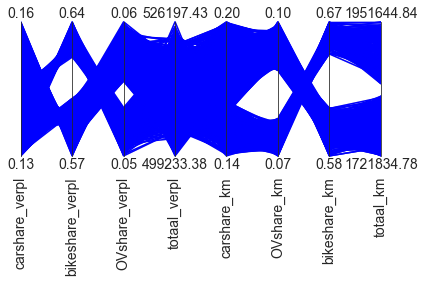

In [28]:
from ema_workbench.analysis import parcoords

# conditional on y
data = pd.DataFrame({k:v[y] for k,v in outcomes.items()})
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data, color='lightgrey')
axes.plot(data, color='blue')
plt.show()

In [29]:
all_data

,carshare_verpl,bikeshare_verpl,OVshare_verpl,totaal_verpl,carshare_km,OVshare_km,bikeshare_km,totaal_km
0,0.154412,0.580769,0.058471,511909.469602,0.185903,0.094984,0.593005,1.776423e+06
1,0.159209,0.578985,0.057258,512797.221360,0.191947,0.092769,0.590562,1.782930e+06
2,0.149082,0.583545,0.060815,521157.310738,0.178937,0.098960,0.595658,1.809530e+06
3,0.160728,0.575995,0.059576,515107.485830,0.193737,0.096441,0.585770,1.793272e+06
4,0.151172,0.585680,0.057004,522358.397513,0.181855,0.092700,0.599174,1.813327e+06
...,...,...,...,...,...,...,...,...
995,0.142896,0.589806,0.057566,520587.252418,0.179997,0.093167,0.599180,1.812883e+06
996,0.128829,0.595024,0.061203,509596.456709,0.160768,0.099796,0.607885,1.764293e+06
997,0.133591,0.593326,0.060976,519398.782667,0.166991,0.099107,0.604392,1.804602e+06
998,0.130429,0.593304,0.061392,513521.981089,0.163038,0.100203,0.605074,1.777057e+06
